In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.cluster import KMeans

In [55]:
# reading the data and looking at the first five rows of the data
data=pd.read_csv("productBBZ.csv")
data.head()

,ItemLookupcode,Product_Line,Item_description,G,Ke,Ko,N,O,"Condiments, Sauces and seasonings",Cookies and Crackers,Cooking and baking,Health and Protein bars,Savoury and Salty Snacks,Sweeteners,unique_customers,sales,units,sales_rank
0,7817,Swerve - Ultimate Sugar Replacement (Foodservi...,Bulk Granular Sweetener,1,1,1,1,0,0,0,0,0,0,1,19,46168,347,1
1,2392,Nick's Sticks - 100% Grass-Fed Beef Sticks,Grass-Fed Nick's Sticks - Original Beef [25-Pack],1,1,0,1,0,0,0,0,0,1,0,36,34949,465,2
2,8679,Carbquik,Carbquik - Complete Biscuit and Baking Mix,0,1,1,0,0,0,0,1,0,0,0,45,27776,2057,3
3,2920,SmartSweets - Stevia-Sweetened Gummy Bears,Stevia-Sweetened Sweet Fish - Berry [12-Pack],1,1,0,1,0,0,0,0,0,0,0,44,22389,746,4
4,912,Anthony's Goods,Organic Oat Fibre,1,1,0,1,1,0,0,1,0,0,0,50,21727,2171,5


In [56]:
# standardizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['G','Ke','Ko','N','O','Condiments, Sauces and seasonings','Cookies and Crackers ','Cooking and baking','Health and Protein bars ','Savoury and Salty Snacks','Sweeteners','unique_customers','sales','units','sales_rank']])

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,6.471652e-17,-4.770054e-16,-1.439385e-16,6.756181e-16,-1.444964e-16,8.346199e-16,1.969391e-16,3.517566e-16,-2.294368e-16,-4.491103e-17,-1.419858e-16,-3.280458e-16,-2.948507e-16,-2.164656e-16,9.707478e-17
std,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00
min,-3.635146e+00,-1.638653e+00,-1.015191e+00,-1.978277e+00,-5.521938e-01,-3.876713e-01,-3.006842e-01,-4.418090e-01,-2.046578e-01,-2.533202e-01,-4.088465e-01,-8.885743e-01,-4.504839e-01,-4.265717e-01,-1.727704e+00
25%,2.750921e-01,-1.638653e+00,-1.015191e+00,5.054904e-01,-5.521938e-01,-3.876713e-01,-3.006842e-01,-4.418090e-01,-2.046578e-01,-2.533202e-01,-4.088465e-01,-6.930241e-01,-4.203015e-01,-3.988124e-01,-8.638522e-01
50%,2.750921e-01,6.102572e-01,9.850366e-01,5.054904e-01,-5.521938e-01,-3.876713e-01,-3.006842e-01,-4.418090e-01,-2.046578e-01,-2.533202e-01,-4.088465e-01,-3.019236e-01,-3.590982e-01,-3.310472e-01,0.000000e+00
75%,2.750921e-01,6.102572e-01,9.850366e-01,5.054904e-01,-5.521938e-01,-3.876713e-01,-3.006842e-01,-4.418090e-01,-2.046578e-01,-2.533202e-01,-4.088465e-01,3.825021e-01,-1.331489e-01,-8.529628e-02,8.638522e-01
max,2.750921e-01,6.102572e-01,9.850366e-01,5.054904e-01,1.810958e+00,2.579505e+00,3.325749e+00,2.263422e+00,4.886205e+00,3.947573e+00,2.445906e+00,4.293506e+00,9.226348e+00,9.400200e+00,1.727704e+00


In [72]:
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [73]:
kmeans.inertia_

5184.315440648004

Text(0, 0.5, 'Inertia')

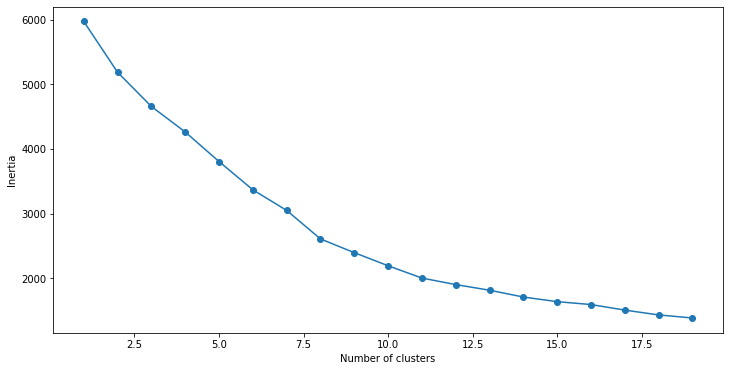

In [74]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [75]:
# k means using 7 clusters and k-means++ initialization
kmeans = KMeans(n_clusters =7, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [76]:
pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 0, 2, 6, 0, 2, 0, 2, 2, 3, 2, 3, 3, 2, 2, 5, 6, 0,
       6, 3, 6, 0, 5, 2, 0, 6, 5, 3, 0, 6, 3, 3, 3, 3, 6, 1, 3, 3, 3, 3,
       0, 1, 3, 3, 3, 3, 3, 3, 5, 6, 6, 3, 3, 5, 0, 0, 0, 3, 6, 3, 0, 3,
       3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 1, 6, 6, 1, 0, 6, 1, 3, 3,
       3, 5, 3, 3, 3, 3, 3, 3, 0, 0, 0, 1, 3, 3, 3, 1, 3, 3, 1, 3, 6, 3,
       3, 3, 6, 3, 0, 3, 3, 5, 0, 6, 3, 3, 3, 1, 0, 3, 1, 3, 1, 3, 3, 0,
       3, 3, 3, 1, 0, 0, 0, 3, 1, 0, 1, 0, 3, 3, 1, 0, 0, 3, 0, 3, 3, 0,
       0, 3, 3, 0, 0, 3, 5, 0, 0, 3, 0, 5, 3, 6, 3, 3, 0, 5, 0, 4, 3, 3,
       3, 3, 3, 3, 3, 6, 0, 0, 3, 3, 1, 4, 0, 5, 3, 3, 0, 0, 3, 3, 1, 1,
       3, 0, 3, 3, 3, 6, 0, 6, 5, 3, 6, 0, 1, 3, 3, 0, 6, 3, 3, 3, 1, 3,
       3, 3, 3, 0, 3, 1, 1, 6, 0, 3, 1, 5, 1, 0, 3, 6, 3, 3, 3, 3, 3, 0,
       3, 5, 3, 5, 0, 1, 4, 3, 4, 0, 3, 3, 0, 3, 3, 6, 6, 6, 0, 4, 3, 1,
       0, 1, 1, 4, 1, 0, 3, 3, 1, 0, 1, 0, 0, 4, 1,

In [77]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

3    161
0     80
1     54
6     33
2     31
5     23
4     16
Name: cluster, dtype: int64

In [78]:
data['cluster']=pred

In [79]:
data

,ItemLookupcode,Product_Line,Item_description,G,Ke,Ko,N,O,"Condiments, Sauces and seasonings",Cookies and Crackers,Cooking and baking,Health and Protein bars,Savoury and Salty Snacks,Sweeteners,unique_customers,sales,units,sales_rank,cluster
0,7817,Swerve - Ultimate Sugar Replacement (Foodservi...,Bulk Granular Sweetener,1,1,1,1,0,0,0,0,0,0,1,19,46168,347,1,2
1,2392,Nick's Sticks - 100% Grass-Fed Beef Sticks,Grass-Fed Nick's Sticks - Original Beef [25-Pack],1,1,0,1,0,0,0,0,0,1,0,36,34949,465,2,2
2,8679,Carbquik,Carbquik - Complete Biscuit and Baking Mix,0,1,1,0,0,0,0,1,0,0,0,45,27776,2057,3,2
3,2920,SmartSweets - Stevia-Sweetened Gummy Bears,Stevia-Sweetened Sweet Fish - Berry [12-Pack],1,1,0,1,0,0,0,0,0,0,0,44,22389,746,4,2
4,912,Anthony's Goods,Organic Oat Fibre,1,1,0,1,1,0,0,1,0,0,0,50,21727,2171,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,B007,Blowholes - Eco-Friendly Paper Straws (Individ...,"Standard Straws - Originals, Individually Wrapped",0,1,0,0,0,0,0,0,0,0,0,2,0,2,394,1
394,6343,Snow Farms - Canadian-Grown Dried Fruit,Dried Cranberries with Pomegranate Flavour,1,0,1,1,0,0,0,0,0,0,0,1,0,1,395,3
395,6344,Snow Farms - Canadian-Grown Dried Fruit,Dried Cranberries with Raspberry Flavour,1,0,1,1,0,0,0,0,0,0,0,1,0,1,396,3
396,7329,The Garlic Box - Ontario Garlic Seasonings,Seasoning - Smoked Garlic,0,1,0,1,0,1,0,0,0,0,0,2,0,2,397,1


In [71]:
data[data['cluster']==4]

,ItemLookupcode,Product_Line,Item_description,G,Ke,Ko,N,O,"Condiments, Sauces and seasonings",Cookies and Crackers,Cooking and baking,Health and Protein bars,Savoury and Salty Snacks,Sweeteners,unique_customers,sales,units,sales_rank,cluster
195,2993,GluteNull Bakery - Single Organic Bars in Trays,Organic Raw Coco D'Lish Bar [30-Pack],1,1,0,1,1,0,0,0,1,0,0,3,445,8,196,4
209,1668,NuGo Nutrition - Real Chocolate Protein Bars,Dark Bar - Mint Chocolate Chip [12-Pack],1,0,1,1,0,0,0,0,1,0,0,6,382,20,210,4
270,702,The GFB - Bars,Chocolate Peanut Butter [12-Pack],1,0,1,1,0,0,0,0,1,0,0,2,209,12,271,4
272,708,The GFB - Bars,Peanut Butter [12-Pack],1,0,1,1,0,0,0,0,1,0,0,1,207,12,273,4
283,1672,NuGo Nutrition - Real Chocolate Protein Bars,Dark Bar - Chocolate Pretzel [12-Pack],1,0,1,1,0,0,0,0,1,0,0,5,185,11,284,4
289,2989,GluteNull Bakery - Single Organic Bars in Trays,Organic Raw Hemp Energy Bar [30-Pack],1,0,0,1,1,0,0,0,1,0,0,3,167,3,290,4
299,1542,NuGo Nutrition - Real Chocolate Protein Bars,Slim Bar - Raspberry Truffle [12-Pack],1,0,1,1,0,0,0,0,1,0,0,3,143,6,300,4
307,1664,NuGo Nutrition - Real Chocolate Protein Bars,Dark Bar - Chocolate Chip [12-Pack],1,0,1,1,0,0,0,0,1,0,0,4,131,7,308,4
322,2987,GluteNull Bakery - Single Organic Bars in Trays,Organic Chia Goji Energy Bar [30-Pack],1,0,0,1,1,0,0,0,1,0,0,2,114,2,323,4
327,1541,NuGo Nutrition - Real Chocolate Protein Bars,Slim Bar - Brownie Crunch [12-Pack],1,0,1,1,0,0,0,0,1,0,0,1,96,4,328,4
